In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Set Working Directory
%cd /content/drive/MyDrive/CSE6242

In [30]:
import pandas as pd
# Load the original and updated datasets
df_original = pd.read_csv("complete_file_merged.csv")
df_updated = pd.read_csv('updated_complete_file_merged_filtered.csv')
df_recency = pd.read_csv('complete_file_merged_filtered_adjusted_1125.csv')
df_recency['normalized_weighted_rating'] = df_recency['normalized_weighted_rating'].round(0)

# Get unique gmap_id and num_of_reviews from both datasets
original_reviews = df_original[['gmap_id', 'num_of_reviews']].drop_duplicates()
updated_reviews = df_updated[['gmap_id', 'num_of_reviews']].drop_duplicates()

# Merge the two datasets on gmap_id to compare num_of_reviews
merged_reviews = pd.merge(original_reviews, updated_reviews, on='gmap_id', suffixes=('_orig', '_upd'))

# Calculate the difference in num_of_reviews for each gmap_id
merged_reviews['review_diff'] = merged_reviews['num_of_reviews_orig'] - merged_reviews['num_of_reviews_upd']

# Get the name_y for each gmap_id from the original dataset
name_mapping = df_original[['gmap_id', 'name_y']].drop_duplicates()

# Combine the information to have gmap_id, name_y, and review_diff
combined_data = pd.merge(merged_reviews, name_mapping, on='gmap_id')

# Get the top 50 gmap_ids based on the largest decrease in num_of_reviews
top_50_review_diff = combined_data.nlargest(50, 'review_diff')[['gmap_id', 'name_y', 'review_diff']]


In [31]:
top_50_review_diff

,gmap_id,name_y,review_diff
548,0x88f50464ee0c6559:0xe2fa0e6431e3fdb8,The Varsity,2144
431,0x88f5046c25254a81:0xc83a97db2139189f,Mary Mac's Tea Room,1047
828,0x88f510392bab4e3d:0x2d83a71dfa680f6a,Main Event Atlanta,923
172,0x88f51044e8bf8f35:0x48615df948600cee,The Cheesecake Factory,843
1176,0x88f50379850e084f:0x4676936f5c130fc5,No Mas! Cantina,743
1085,0x88f50f58295877e1:0xbcc1594fa3150390,The Cheesecake Factory,686
173,0x88f4fd76088c4377:0x7612cf01542f355,IHOP,684
608,0x88f504d0aae6eaa9:0xbb43e9fc727e2f90,Topgolf,662
193,0x88f5041b318e7faf:0xa42a4ac269cd9434,TWO urban licks,639
1270,0x88f5047de4f78d63:0xbd9362347dc450a5,Atlanta Breakfast Club,639


/var/folders/1h/h0_h9l1d3rl1k3k5pf230mlw0000gn/T/ipykernel_68747/443728879.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_specific['datetime'] = df_original_specific['time'].apply(unix_to_datetime)
/var/folders/1h/h0_h9l1d3rl1k3k5pf230mlw0000gn/T/ipykernel_68747/443728879.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated_specific['datetime'] = df_updated_specific['time'].apply(unix_to_datetime)
/var/folders/1h/h0_h9l1d3rl1k3k5pf230mlw0000gn/T/ipykernel_68747/443728879.py:19: 

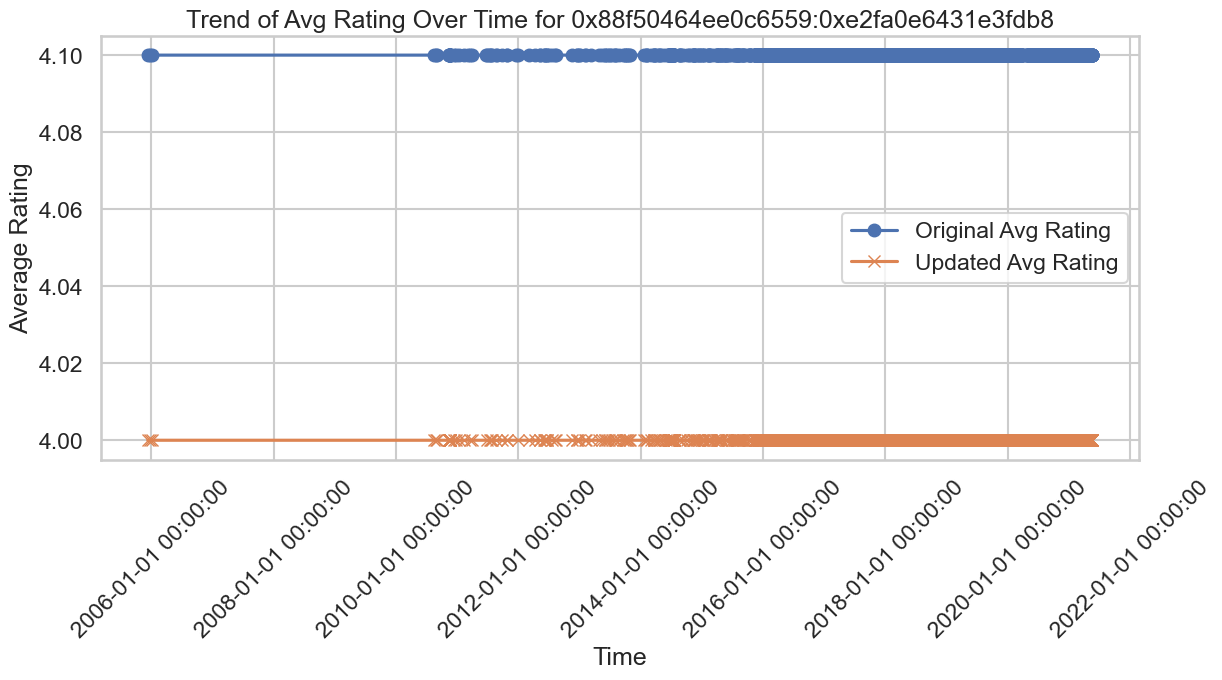

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to convert UNIX timestamp to datetime
def unix_to_datetime(unix_time):
    return pd.to_datetime(unix_time, unit='ms')

# Filter the data for the specific gmap_id
gmap_id = '0x88f50464ee0c6559:0xe2fa0e6431e3fdb8'
df_original_specific = df_original[df_original['gmap_id'] == gmap_id]
df_updated_specific = df_recency[df_recency['gmap_id'] == gmap_id]
# df_recency_specific = df_recency[df_recency['gmap_id'] == gmap_id]
# Convert the 'time' column to datetime
df_original_specific['datetime'] = df_original_specific['time'].apply(unix_to_datetime)
df_updated_specific['datetime'] = df_updated_specific['time'].apply(unix_to_datetime)

# Sort by datetime
df_original_specific.sort_values('datetime', inplace=True)
df_updated_specific.sort_values('datetime', inplace=True)

# Plotting the trend lines
plt.figure(figsize=(12, 6))

# Plot the original avg_rating trend
plt.plot(df_original_specific['datetime'], df_original_specific['avg_rating'], label='Original Avg Rating', marker='o')

# Plot the updated avg_rating trend
plt.plot(df_updated_specific['datetime'], df_updated_specific['updated_weighted_avg_rating'], label='Updated Avg Rating', marker='x')

# Formatting the plot
plt.title(f'Trend of Avg Rating Over Time for {gmap_id}')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Show plot with a grid
plt.grid(True)
plt.show()


In [33]:
import pandas as pd

# Filter for only 5-star ratings
five_star_reviews_o = df_orig_specific[df_orig_specific['rating'] == 5]
five_star_reviews_u = df_upd_specific[df_upd_specific['rating'] == 5]
# Convert 'time' to datetime
five_star_reviews_o['datetime'] = pd.to_datetime(five_star_reviews_o['time'], unit='ms')
five_star_reviews_u['datetime'] = pd.to_datetime(five_star_reviews_u['time'], unit='ms')
# Set 'datetime' as the index
five_star_reviews_o.set_index('datetime', inplace=True)
five_star_reviews_u.set_index('datetime', inplace=True)
# Resample to get monthly counts of 5-star reviews
orig_monthly_5_stars = five_star_reviews_o.resample('M').size()
upd_monthly_5_stars = five_star_reviews_u.resample('M').size()


/var/folders/1h/h0_h9l1d3rl1k3k5pf230mlw0000gn/T/ipykernel_68747/3438879309.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star_reviews_o['datetime'] = pd.to_datetime(five_star_reviews_o['time'], unit='ms')
/var/folders/1h/h0_h9l1d3rl1k3k5pf230mlw0000gn/T/ipykernel_68747/3438879309.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star_reviews_u['datetime'] = pd.to_datetime(five_star_reviews_u['time'], unit='ms')


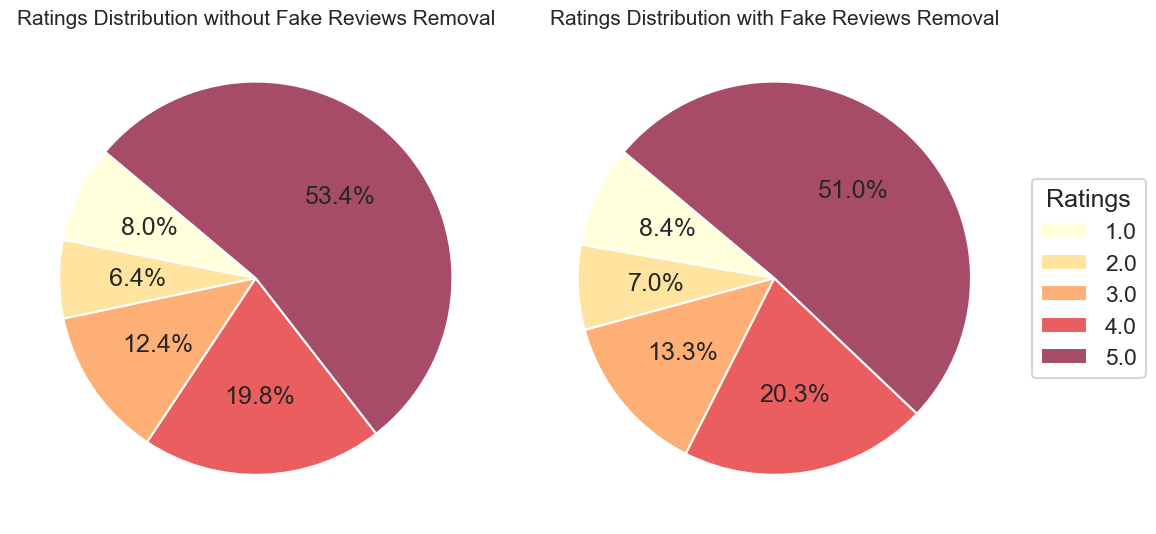

In [34]:
import matplotlib.pyplot as plt
from branca.colormap import linear as cm
import matplotlib.colors as mcolors
from branca import colormap


# Filter for the specific gmap_id
gmap_id = '0x88f50464ee0c6559:0xe2fa0e6431e3fdb8'
df_orig_specific = df_original[df_original['gmap_id'] == gmap_id]
df_upd_specific = df_updated[df_updated['gmap_id'] == gmap_id]

# Calculate the rating distribution
rating_distribution_orig = df_orig_specific['rating'].value_counts(normalize=True).sort_index()
rating_distribution_upd = df_upd_specific['rating'].value_counts(normalize=True).sort_index()

# Generate a colormap from 'branca'
colormap = colormap.linear.YlOrRd_09.scale(1, 5)
colormap = colormap.to_step(5)

# Get the colors for each rating value
colors_orig = [colormap.rgb_hex_str(value) for value in rating_distribution_orig.index]
colors_upd = [colormap.rgb_hex_str(value) for value in rating_distribution_upd.index]

# Convert hex colors to RGBA with alpha for pie chart usage
colors_with_alpha_orig = [mcolors.to_rgba(color, alpha=0.7) for color in colors_orig]
colors_with_alpha_upd = [mcolors.to_rgba(color, alpha=0.7) for color in colors_upd]

# Create the pie charts with these new colors having adjusted opacity
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

# Original data pie chart
patches_orig, texts_orig, autotexts_orig = axs[0].pie(rating_distribution_orig, 
                                                       autopct='%1.1f%%', 
                                                       startangle=140, 
                                                       colors=colors_with_alpha_orig)
axs[0].set_title('Ratings Distribution without Fake Reviews Removal', fontsize=15)

# Updated data pie chart
patches_upd, texts_upd, autotexts_upd = axs[1].pie(rating_distribution_upd, 
                                                    autopct='%1.1f%%', 
                                                    startangle=140, 
                                                    colors=colors_with_alpha_upd)
axs[1].set_title('Ratings Distribution with Fake Reviews Removal',fontsize=15)

# Set up the legends
# axs[0].legend(patches_orig, rating_distribution_orig.index, title="Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axs[1].legend(patches_upd, rating_distribution_upd.index, title="Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# plt.suptitle(f'Rating Distribution Comparison for The Vasity')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the subplots to fit the legends
plt.show()


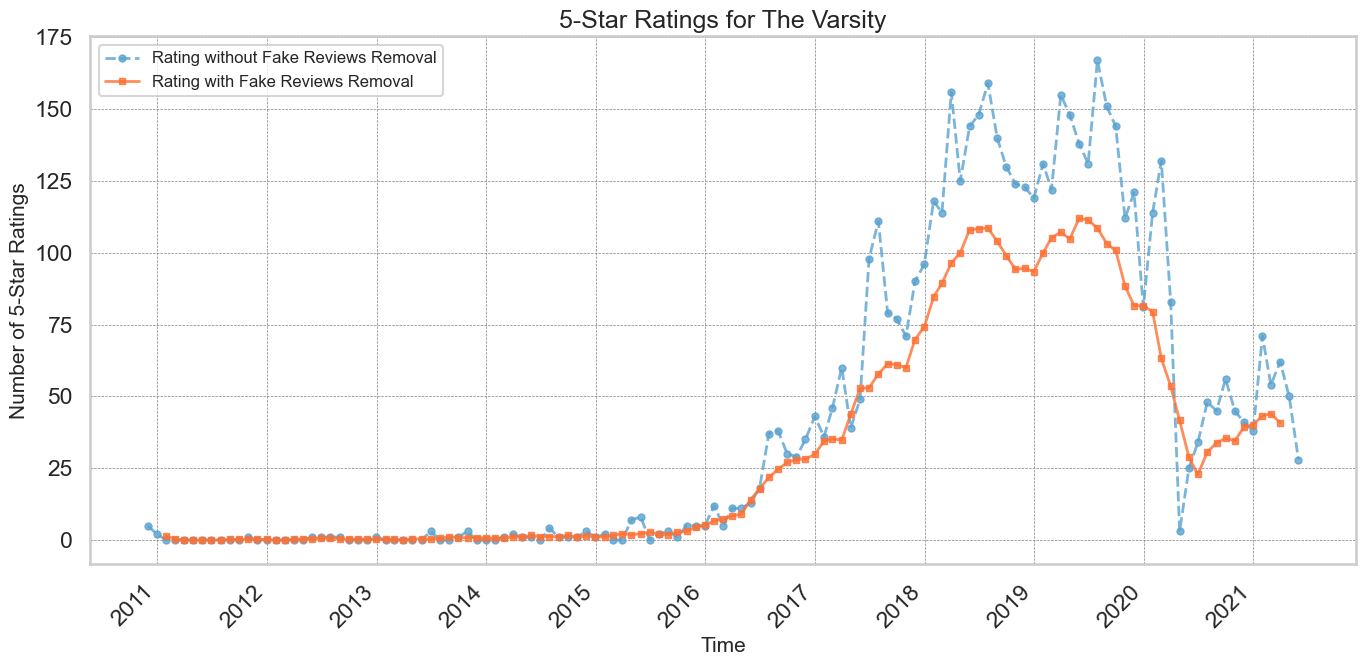

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from branca.colormap import linear

# Set the style for seaborn
sns.set(style="whitegrid", context="talk")

# Create a linear colormap from branca
colormap_1 = linear.Blues_09.scale(0, 1)  # You can adjust the scale as needed
colormap_1 = colormap_1.to_step(10)  # Number of steps in the colormap
colormap_2 = linear.YlOrRd_09.scale(0, 1)  # You can adjust the scale as needed
colormap_2 = colormap_2.to_step(10)  # Number of steps in the colormap

# Get the colors from the colormap
colors_1 = [colormap_1.rgb_hex_str(step / 10) for step in range(10)]
colors_2 = [colormap_2.rgb_hex_str(step / 10) for step in range(10)]
# Set the style of seaborn for more appealing plots
sns.set(style="whitegrid", context="talk")

# Define two different window sizes for the rolling averages
window_size_orig = 1
window_size_upd = 5

# Apply rolling mean to smooth the data with different window sizes
orig_smoothed = orig_monthly_5_stars.rolling(window=window_size_orig, center=True).mean()
upd_smoothed = upd_monthly_5_stars.rolling(window=window_size_upd, center=True).mean()

# Create a single plot
plt.figure(figsize=(14, 7))

# Plot the original 5-star ratings trend with window size 3
plt.plot(orig_smoothed.index, orig_smoothed, label=f'Rating without Fake Reviews Removal', alpha=0.8, linewidth=2,linestyle='--',color=colors_1[5], marker='o', markersize=5)

# Plot the updated 5-star ratings trend with window size 6
plt.plot(upd_smoothed.index, upd_smoothed, label=f'Rating with Fake Reviews Removal', alpha=0.8, linewidth=2, color = colors_2[5], marker='s', markersize=5)

# Formatting the plot
plt.title(f'5-Star Ratings for The Varsity', fontsize=18)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of 5-Star Ratings', fontsize=15)
plt.legend(frameon=True, fontsize=12, loc='upper left')

# Improve the grid
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Set x-axis to show only the first month of each year (typically January)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate the x-axis labels for better readability and set the alignment
plt.xticks(rotation=45, ha='right')

# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
# Calculating and comparing variance
variance_orig = df_orig_specific['rating'].var()
variance_upd = df_upd_specific['rating'].var()

print(f'Variance in Original Ratings: {variance_orig}')
print(f'Variance in Updated Ratings: {variance_upd}')


Variance in Original Ratings: 1.63137960996142
Variance in Updated Ratings: 1.6760986695593925


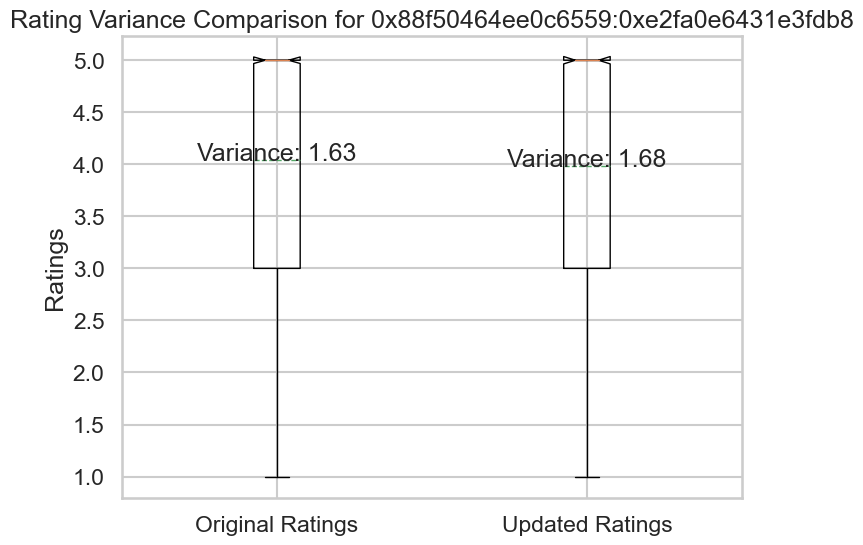

In [37]:
# Filter for the specific gmap_id
gmap_id = '0x88f50464ee0c6559:0xe2fa0e6431e3fdb8'
df_orig_specific = df_original[df_original['gmap_id'] == gmap_id]
df_upd_specific = df_updated[df_updated['gmap_id'] == gmap_id]

# Creating boxplots
plt.figure(figsize=(8, 6))

# Data for boxplots
ratings_data = [df_orig_specific['rating'], df_upd_specific['rating']]
labels = ['Original Ratings', 'Updated Ratings']

plt.boxplot(ratings_data, labels=labels, notch=True, showmeans=True, meanline=True)
plt.title(f'Rating Variance Comparison for {gmap_id}')
plt.ylabel('Ratings')

# Highlighting the variance
plt.text(1, df_orig_specific['rating'].mean(), f'Variance: {variance_orig:.2f}', ha='center')
plt.text(2, df_upd_specific['rating'].mean(), f'Variance: {variance_upd:.2f}', ha='center')

# Show the plot
plt.show()